In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [69]:
#importing the train and the test datasets

raw_train_dataset = pd.read_csv("D://data//train.csv")
raw_test_dataset = pd.read_csv("D://data//test.csv")

raw_train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
# shape of the train and the test dataset
raw_train_dataset.shape[0]  #891 
raw_test_dataset.shape[0]   #418

418

In [71]:
## Data Preprocessing

#drop the columns not needed
train_dataset = raw_train_dataset.drop(['PassengerId','Ticket'],axis=1)
test_dataset = raw_test_dataset.drop(['PassengerId','Ticket'],axis=1)

In [72]:
#finding the missing values
train_dataset.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [73]:
test_dataset.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [74]:
#Cabin

train_dataset['Cabin'].unique()
train_dataset['Cabin'] = train_dataset['Cabin'].fillna('U0')
train_dataset['CabinDeck'] = train_dataset['Cabin'].astype(str).str[0]

In [75]:
test_dataset['Cabin'].unique()
test_dataset['Cabin'] = test_dataset['Cabin'].fillna('U0')
test_dataset['CabinDeck'] = test_dataset['Cabin'].astype(str).str[0]

In [76]:
# fill the missing values with appropriate values
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
dataset = [train_dataset, test_dataset]
for df in dataset:
    #age (median)
    df['Age']=df['Age'].fillna(df['Age'].median())

    #cabin   
    df['CabinDeck'] = df['CabinDeck'].map(deck)
    df['CabinDeck'] = df['CabinDeck'].fillna(0)
    df['CabinDeck'] = df['CabinDeck'].astype(int)
    
    #Embarked
    df['Embarked'] = df['Embarked'].fillna('S')
    
    df['Fare'] = df['Fare'].fillna(0)
    df['Fare'] = df['Fare'].astype(int)

In [77]:
train_dataset.isna().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Cabin        0
Embarked     0
CabinDeck    0
dtype: int64

In [78]:
train_dataset['Name'] = train_dataset.Name.str.split(",").str.get(1).str.split().str.get(0)
test_dataset['Name'] = test_dataset.Name.str.split(",").str.get(1).str.split().str.get(0)

In [79]:
for df in dataset:
    df['Name'] = df['Name'].replace(['Lady.', 'Countess.','Capt.', 'Col.','Don.', 'Dr.','Major.', 'Rev.', 'Sir.','Jonkheer.' ,'Dona.','the'], 'Misc.')
    df['Name'] = df['Name'].replace('Mlle.','Miss.')
    df['Name'] = df['Name'].replace('Mme.','Miss.')
    df['Name'] = df['Name'].replace('Ms.','Miss.')
    df['Name'] = df['Name'].replace('Master.','Mr.')

In [80]:
train_dataset.isna().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Cabin        0
Embarked     0
CabinDeck    0
dtype: int64

In [81]:
processed_test_dataset = test_dataset.drop('Cabin',axis=1)
processed_train_dataset = train_dataset.drop('Cabin',axis=1)
processed_test_dataset.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinDeck
0,3,Mr.,male,34.5,0,0,7,Q,8
1,3,Mrs.,female,47.0,1,0,7,S,8
2,2,Mr.,male,62.0,0,0,9,Q,8
3,3,Mr.,male,27.0,0,0,8,S,8
4,3,Mrs.,female,22.0,1,1,12,S,8


In [82]:
processed_test_dataset.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinDeck
0,3,Mr.,male,34.5,0,0,7,Q,8
1,3,Mrs.,female,47.0,1,0,7,S,8
2,2,Mr.,male,62.0,0,0,9,Q,8
3,3,Mr.,male,27.0,0,0,8,S,8
4,3,Mrs.,female,22.0,1,1,12,S,8


In [83]:
import seaborn as sns
sns.set()

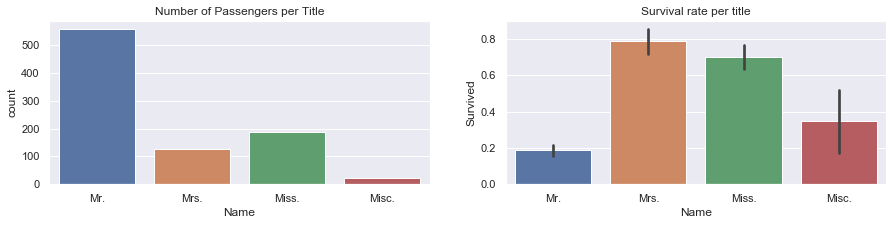

In [84]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.title('Number of Passengers per Title')
sns.countplot(processed_train_dataset['Name'])
plt.subplot(1,2,2)
plt.title('Survival rate per title')
sns.barplot(processed_train_dataset['Name'],train_dataset['Survived'])

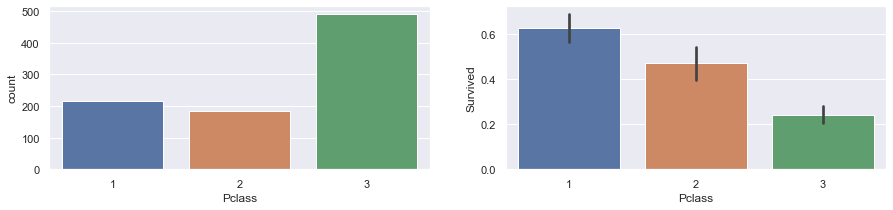

In [85]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.countplot(processed_train_dataset['Pclass'])
plt.subplot(1,2,2)
sns.barplot(processed_train_dataset['Pclass'],train_dataset['Survived'])

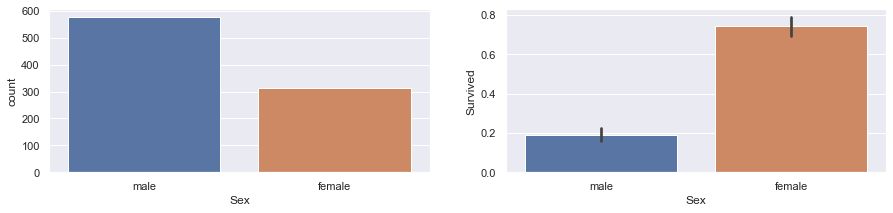

In [86]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.countplot(processed_train_dataset['Sex'])
plt.subplot(1,2,2)
sns.barplot(processed_train_dataset['Sex'],train_dataset['Survived'])

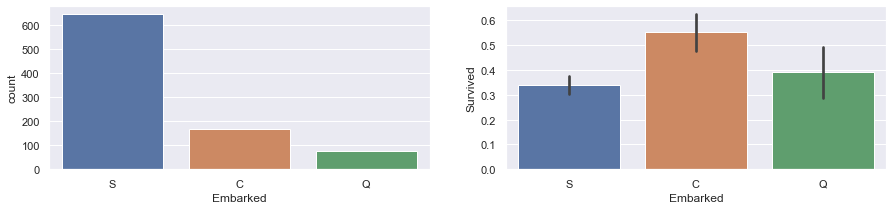

In [87]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.countplot(processed_train_dataset['Embarked'])
plt.subplot(1,2,2)
sns.barplot(processed_train_dataset['Embarked'],train_dataset['Survived'])

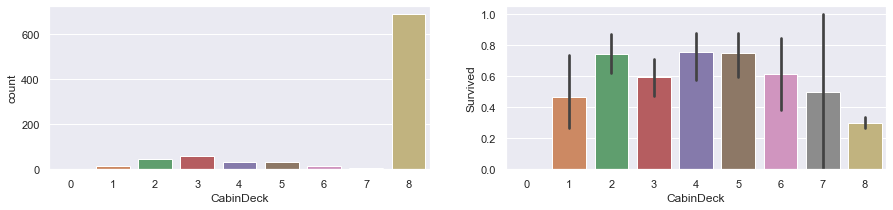

In [88]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.countplot(processed_train_dataset['CabinDeck'])
plt.subplot(1,2,2)
sns.barplot(processed_train_dataset['CabinDeck'],train_dataset['Survived'])

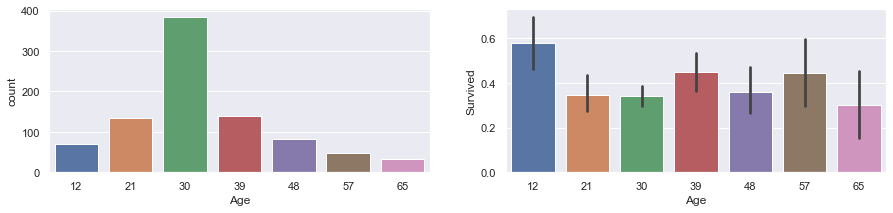

In [89]:
df = processed_train_dataset[['Age','Survived','Sex']].copy()
df['Age'] = df['Age'].astype(int)
df.loc[df['Age'] <= 12, 'Age'] = 12
df.loc[(df['Age'] >= 13) & (df['Age'] <= 21), 'Age'] = 21
df.loc[(df['Age'] >= 22) & (df['Age'] <= 30), 'Age'] = 30
df.loc[(df['Age'] >= 31) & (df['Age'] <= 39), 'Age'] = 39
df.loc[(df['Age'] >= 40) & (df['Age'] <= 48), 'Age'] = 48
df.loc[(df['Age'] >= 49) & (df['Age'] <= 57), 'Age'] = 57
df.loc[(df['Age'] >= 58) & (df['Age'] <= 65), 'Age'] = 65
df.loc[df['Age'] > 65, 'Age'] = 65


plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.countplot(df['Age'])
plt.subplot(1,2,2)
sns.barplot(df['Age'],df['Survived'])

plt.show()

In [90]:
dataset = [processed_train_dataset,processed_test_dataset]
for ds in dataset:
    ds['Age'] = ds['Age'].astype(np.int64)
    ds.loc[ds['Age'] <= 12, 'Age'] = 0
    ds.loc[(ds['Age'] >= 13) & (ds['Age'] <= 21), 'Age'] = 1
    ds.loc[(ds['Age'] >= 22) & (ds['Age'] <= 30), 'Age'] = 2
    ds.loc[(ds['Age'] >= 31) & (ds['Age'] <= 39), 'Age'] = 3
    ds.loc[(ds['Age'] >= 40) & (ds['Age'] <= 48), 'Age'] = 4
    ds.loc[(ds['Age'] >= 49) & (ds['Age'] <= 57), 'Age'] = 5
    ds.loc[(ds['Age'] >= 58) & (ds['Age'] <= 65), 'Age'] = 6
    ds.loc[ds['Age'] > 65, 'Age'] = 7          
    
    ds.loc[ ds['Fare'] <= 7.91, 'Fare'] = 0
    ds.loc[(ds['Fare'] > 7.91) & (ds['Fare'] <= 14.454), 'Fare'] = 1
    ds.loc[(ds['Fare'] > 14.454) & (ds['Fare'] <= 31), 'Fare']   = 2
    ds.loc[(ds['Fare'] > 31) & (ds['Fare'] <= 99), 'Fare']   = 3
    ds.loc[(ds['Fare'] > 99) & (ds['Fare'] <= 250), 'Fare']   = 4
    ds.loc[ ds['Fare'] > 250, 'Fare'] = 5
    ds['Fare'] = ds['Fare'].astype(int)

In [91]:
for ds in dataset:
    ds['Name']=ds['Name'].map({'Mr.':0,'Mrs.':1,'Miss.':2,'Misc.':3})
    ds['Sex']=ds['Sex'].map({'male':0,'female':1})
    ds['Embarked']=ds['Embarked'].map({'S':0,'C':1,'Q':2})
    
    ds['Age_Sex']= ds['Age']* ds['Sex']
    ds['Age_Pclass']= ds['Age']* ds['Pclass']
    ds['Sex_SibSp']= ds['Sex']* ds['SibSp']

In [92]:
processed_test_dataset.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinDeck,Age_Sex,Age_Pclass,Sex_SibSp
0,3,0,0,3,0,0,0,2,8,0,9,0
1,3,1,1,4,1,0,0,0,8,4,12,1
2,2,0,0,6,0,0,1,2,8,0,12,0
3,3,0,0,2,0,0,1,0,8,0,6,0
4,3,1,1,2,1,1,1,0,8,2,6,1


In [93]:
# preparing the model

Y_train = processed_train_dataset.pop('Survived')
X_train = processed_train_dataset.copy()
X_test = processed_test_dataset.copy()

In [94]:
X_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinDeck,Age_Sex,Age_Pclass,Sex_SibSp
0,3,0,0,3,0,0,0,2,8,0,9,0
1,3,1,1,4,1,0,0,0,8,4,12,1
2,2,0,0,6,0,0,1,2,8,0,12,0
3,3,0,0,2,0,0,1,0,8,0,6,0
4,3,1,1,2,1,1,1,0,8,2,6,1


In [95]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [96]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
pred = logreg.predict(X_train[10:20])

In [98]:
predictions = logreg.predict(X_test)

In [99]:
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [100]:
acc_log

80.7

In [101]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier 
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")  

91.92 %


In [102]:
submission = pd.DataFrame({'PassengerId': raw_test_dataset['PassengerId'], 'Survived': Y_prediction})
submission.to_csv('titanicpredictionRF.csv', index=False)

### using Neural Network

In [103]:
processed_train_dataset.dtypes

Pclass        int64
Name          int64
Sex           int64
Age           int64
SibSp         int64
Parch         int64
Fare          int32
Embarked      int64
CabinDeck     int32
Age_Sex       int64
Age_Pclass    int64
Sex_SibSp     int64
dtype: object

In [104]:
processed_train_dataset.dtypes

Pclass        int64
Name          int64
Sex           int64
Age           int64
SibSp         int64
Parch         int64
Fare          int32
Embarked      int64
CabinDeck     int32
Age_Sex       int64
Age_Pclass    int64
Sex_SibSp     int64
dtype: object

In [136]:
#create a model
def get_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    return model

In [106]:
y_train_NN = Y_train.values.copy()
X_train_NN = processed_train_dataset.values
X_test_NN = processed_test_dataset.values

In [107]:
newmodel = get_model()
newmodel.fit(X_train_NN, y_train_NN, batch_size=32 , epochs=10)

Train on 891 samples
Epoch 1/10
891/891 [==============================] - 3s 4ms/sample - loss: 0.5959 - accuracy: 0.7059
Epoch 2/10
891/891 [==============================] - 0s 99us/sample - loss: 0.4998 - accuracy: 0.7789
Epoch 3/10
891/891 [==============================] - 0s 106us/sample - loss: 0.4521 - accuracy: 0.8215
Epoch 4/10
891/891 [==============================] - 0s 145us/sample - loss: 0.4351 - accuracy: 0.8148
Epoch 5/10
891/891 [==============================] - 0s 113us/sample - loss: 0.4303 - accuracy: 0.8137
Epoch 6/10
891/891 [==============================] - 0s 108us/sample - loss: 0.4291 - accuracy: 0.8137
Epoch 7/10
891/891 [==============================] - 0s 121us/sample - loss: 0.4260 - accuracy: 0.8103
Epoch 8/10
891/891 [==============================] - 0s 198us/sample - loss: 0.4191 - accuracy: 0.8171
Epoch 9/10
891/891 [==============================] - 0s 106us/sample - loss: 0.4199 - accuracy: 0.8159
Epoch 10/10
891/891 [=========================

In [108]:
y_pred = newmodel.predict(X_test_NN)
y_final = (y_pred > 0.5).astype(int).reshape(X_test_NN.shape[0])

In [109]:
submission = pd.DataFrame({'PassengerId': raw_test_dataset['PassengerId'], 'Survived': y_final})
submission.to_csv('predictionNN0.csv', index=False)

### Another NN example

In [110]:
new_train = processed_train_dataset.drop(labels=['SibSp','Parch','Age','Fare','Name'], axis=1)
new_test = processed_test_dataset.drop(labels=['SibSp','Parch','Age','Fare','Name'], axis=1)
#y_train_NN = Y_train.values.copy()
X_train_NN_1 = new_train.values
X_test_NN_1 = new_test.values

In [116]:
newmodel = get_model()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = newmodel.fit(X_train_NN_1, y_train_NN, batch_size=32 ,validation_split=0.2, epochs=150,callbacks=callback)

Train on 712 samples, validate on 179 samples
Epoch 1/150
712/712 [==============================] - 1s 2ms/sample - loss: 0.6493 - accuracy: 0.6784 - val_loss: 0.5527 - val_accuracy: 0.8045
Epoch 2/150
712/712 [==============================] - 0s 132us/sample - loss: 0.5395 - accuracy: 0.7444 - val_loss: 0.4781 - val_accuracy: 0.7709
Epoch 3/150
712/712 [==============================] - 0s 121us/sample - loss: 0.5083 - accuracy: 0.7669 - val_loss: 0.4670 - val_accuracy: 0.8045
Epoch 4/150
712/712 [==============================] - 0s 166us/sample - loss: 0.4899 - accuracy: 0.7879 - val_loss: 0.4523 - val_accuracy: 0.8101
Epoch 5/150
712/712 [==============================] - 0s 108us/sample - loss: 0.4791 - accuracy: 0.7837 - val_loss: 0.4352 - val_accuracy: 0.7989
Epoch 6/150
712/712 [==============================] - 0s 124us/sample - loss: 0.4744 - accuracy: 0.7837 - val_loss: 0.4278 - val_accuracy: 0.8101
Epoch 7/150
712/712 [==============================] - 0s 131us/sample - l

712/712 [==============================] - 0s 104us/sample - loss: 0.4193 - accuracy: 0.8202 - val_loss: 0.3632 - val_accuracy: 0.8603
Epoch 57/150
712/712 [==============================] - 0s 104us/sample - loss: 0.4229 - accuracy: 0.8202 - val_loss: 0.3815 - val_accuracy: 0.8380
Epoch 58/150
712/712 [==============================] - 0s 112us/sample - loss: 0.4160 - accuracy: 0.8216 - val_loss: 0.3597 - val_accuracy: 0.8603
Epoch 59/150
712/712 [==============================] - 0s 115us/sample - loss: 0.4177 - accuracy: 0.8230 - val_loss: 0.3641 - val_accuracy: 0.8436
Epoch 60/150
712/712 [==============================] - 0s 111us/sample - loss: 0.4171 - accuracy: 0.8202 - val_loss: 0.3667 - val_accuracy: 0.8380
Epoch 61/150
712/712 [==============================] - 0s 119us/sample - loss: 0.4155 - accuracy: 0.8230 - val_loss: 0.3729 - val_accuracy: 0.8324
Epoch 62/150
712/712 [==============================] - 0s 148us/sample - loss: 0.4175 - accuracy: 0.8216 - val_loss: 0.3625 

712/712 [==============================] - 0s 191us/sample - loss: 0.4006 - accuracy: 0.8287 - val_loss: 0.3622 - val_accuracy: 0.8324
Epoch 112/150
712/712 [==============================] - 0s 140us/sample - loss: 0.3999 - accuracy: 0.8244 - val_loss: 0.3635 - val_accuracy: 0.8324
Epoch 113/150
712/712 [==============================] - 0s 116us/sample - loss: 0.3997 - accuracy: 0.8371 - val_loss: 0.3676 - val_accuracy: 0.8436
Epoch 114/150
712/712 [==============================] - 0s 116us/sample - loss: 0.4002 - accuracy: 0.8315 - val_loss: 0.3556 - val_accuracy: 0.8603
Epoch 115/150
712/712 [==============================] - 0s 125us/sample - loss: 0.4012 - accuracy: 0.8329 - val_loss: 0.3563 - val_accuracy: 0.8492
Epoch 116/150
712/712 [==============================] - 0s 117us/sample - loss: 0.3998 - accuracy: 0.8301 - val_loss: 0.3591 - val_accuracy: 0.8324
Epoch 117/150
712/712 [==============================] - 0s 114us/sample - loss: 0.3991 - accuracy: 0.8343 - val_loss: 0

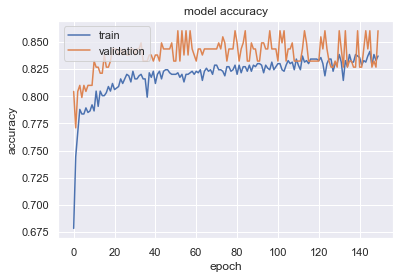

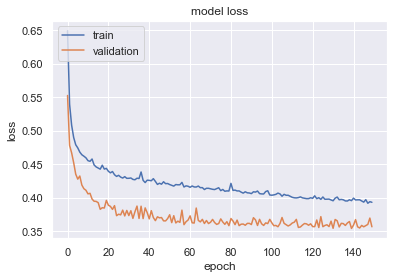

In [122]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [121]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [137]:
newmodel = get_model()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = newmodel.fit(X_train_NN_1, y_train_NN, batch_size=32 ,validation_split=0.2, epochs=150,callbacks=[callback])

Train on 712 samples, validate on 179 samples
Epoch 1/150
712/712 [==============================] - 1s 1ms/sample - loss: 0.7605 - accuracy: 0.3764 - val_loss: 0.7206 - val_accuracy: 0.3352
Epoch 2/150
712/712 [==============================] - 0s 113us/sample - loss: 0.6854 - accuracy: 0.5941 - val_loss: 0.6640 - val_accuracy: 0.6760
Epoch 3/150
712/712 [==============================] - 0s 124us/sample - loss: 0.6516 - accuracy: 0.6559 - val_loss: 0.6272 - val_accuracy: 0.6983
Epoch 4/150
712/712 [==============================] - 0s 99us/sample - loss: 0.6301 - accuracy: 0.6517 - val_loss: 0.6028 - val_accuracy: 0.7151
Epoch 5/150
712/712 [==============================] - 0s 115us/sample - loss: 0.6150 - accuracy: 0.6643 - val_loss: 0.5819 - val_accuracy: 0.7318
Epoch 6/150
712/712 [==============================] - 0s 144us/sample - loss: 0.5979 - accuracy: 0.6812 - val_loss: 0.5637 - val_accuracy: 0.7263
Epoch 7/150
712/712 [==============================] - 0s 119us/sample - lo

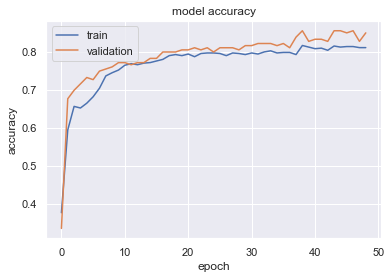

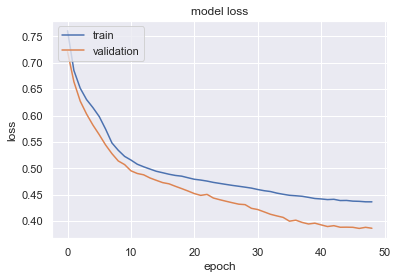

In [138]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [139]:
y_pred_1 = newmodel.predict(X_test_NN_1)
y_final_1 = (y_pred_1 > 0.5).astype(int).reshape(X_test_NN_1.shape[0])

In [140]:
submission = pd.DataFrame({'PassengerId': raw_test_dataset['PassengerId'], 'Survived': y_final_1})
submission.to_csv('predictionNN3.csv', index=False)